## Entrenamiento con redes neuronales

---

### Con limpieza específica basada en el analisis preliminar

In [1]:
%run "Funciones.py"
%matplotlib inline

In [2]:
# Importo los datos como dataframe de pandas
real = pd.read_csv("Data/True.csv")
fake = pd.read_csv("Data/Fake.csv")

### Aplicamos alguna limpieza previa

Difference in Text

Real news seems to have source of publication which is not present in fake news set

Looking at the data:

*most of text contains reuters information such as "WASHINGTON (Reuters)"

*Some text are tweets from Twitter

*Few text do not contain any publication info

In [3]:
# First Creating list of index that do not have publication part
unknown_publishers = []
for index,row in enumerate(real.text.values):
    try:
        record = row.split(" -", maxsplit=1)
        #if no text part is present, following will give error
        record[1]
        #if len of piblication part is greater than 260
        #following will give error, ensuring no text having "-" in between is counted
        assert(len(record[0]) < 260)
    except:
        unknown_publishers.append(index)

In [4]:
# Thus we have list of indices where publisher is not mentioned
# lets check
real.iloc[unknown_publishers].text
# true, they do not have text like "WASHINGTON (Reuters)"

3488     The White House on Wednesday disclosed a group...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5784     Federal appeals court judge Neil Gorsuch, the ...
6660     Republican members of Congress are complaining...
6823     Over the course of the U.S. presidential campa...
7922     After going through a week reminiscent of Napo...
8194     The following timeline charts the origin and s...
8195     Global health officials are racing to better u...
8247     U.S. President Barack Obama visited a street m...
8465     ALGONAC, MICH.—Parker Fox drifted out of the D...
8481     Global health officials are racing to better u...
8482     The following timeline charts the origin and s...
8505     Global health officials are racing to better u...
8506     The following timeline charts the origin and s...
8771     In a speech weighted with America’s complicate...
8970                                                    

In [5]:
# Seperating Publication info, from actual text
publisher = []
tmp_text = []
for index,row in enumerate(real.text.values):
    if index in unknown_publishers:
        #Add unknown of publisher not mentioned
        tmp_text.append(row)
        
        publisher.append("Unknown")
        continue
    record = row.split(" -", maxsplit=1)
    publisher.append(record[0])
    tmp_text.append(record[1])

In [6]:
# Replace existing text column with new text
# add seperate column for publication info
# real["publisher"] = publisher
real["text"] = tmp_text

del publisher, tmp_text, record, unknown_publishers

In [7]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017"


In [8]:
# dropping this record
real = real.drop(8970, axis=0)

#### Hasta aca se elimino la agencia que solo esta presente en las noticias reales

In [9]:
# Mezclamos los 2 dataframes y los ramdomisamos el orden
news = real.append(fake, ignore_index=True)
news = shuffle(news)
news

,title,text,subject,date
25405,Veteran Spy: Trump Trading Secret Info With R...,The connection between Donald Trump s presiden...,News,"October 31, 2016"
10791,Obama to make historic trip to Cuba in coming ...,President Barack Obama will visit Cuba in the...,politicsNews,"February 18, 2016"
8563,"The Big Squeeze: This election year, it’s all ...","Two years ago, Judy Konopka and Craig Diangel...",politicsNews,"August 2, 2016"
20850,France's Macron plans end to retire-young rail...,President Emmanuel Macron wants to scrap rule...,worldnews,"September 6, 2017"
33747,DONALD TRUMP Calls Meeting With Press…Dresses ...,They had to know they had it coming Donald Tru...,politics,"Nov 22, 2016"
...,...,...,...,...
34327,REPORTER SHOCKS HILLARY BY SHOWING UP: Watch T...,Clinton just left Apple Seeds kids center in...,politics,"Sep 26, 2016"
4766,Black lawmakers meet with Trump about infrastr...,Leaders of the Congressional Black Caucus met...,politicsNews,"March 22, 2017"
18587,Austrian chancellor pledges to get to the bott...,Austria s Social Democratic (SPO) Chancellor ...,worldnews,"October 1, 2017"
36390,“G#d d*mn America”: DISTURBING PHOTOS Illustra...,Yes this massive protest against America just ...,politics,"Nov 4, 2015"


[Text(0, 0, 'News'),
 Text(1, 0, 'politicsNews'),
 Text(2, 0, 'worldnews'),
 Text(3, 0, 'politics'),
 Text(4, 0, 'Middle-east'),
 Text(5, 0, 'US_News'),
 Text(6, 0, 'left-news'),
 Text(7, 0, 'Government News')]

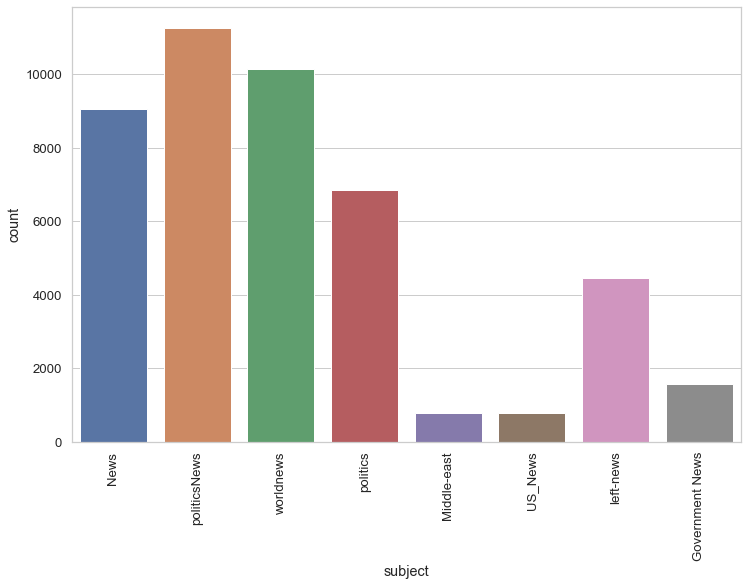

In [10]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "subject", data = news)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [11]:
#Combinamos columnas de texto
news['text'] = news['title'] + " " + news['text']
news.drop(['title', 'date'], axis=1, inplace=True)
news.sample(5)

,text,subject
10008,Colorado lawmaker aims to outlaw pot-laced gum...,politicsNews
7012,No formal U.S. delegation to Castro memorial: ...,politicsNews
40128,BREAKING NEWS: NYPD Cracking Down On Anti-Trum...,left-news
13011,London mayor calls for UK apology over colonia...,worldnews
32133,NEW NORMAL? MASSIVE MUSIC FESTIVAL In Angela M...,politics


In [12]:
news.shape

(44897, 2)

### Codificamos etiquetas

In [13]:
le = preprocessing.LabelEncoder()
news['subject'] = le.fit_transform(news['subject'])
news['subject'].value_counts()

6    11271
7    10145
2     9050
5     6841
4     4459
0     1570
3      783
1      778
Name: subject, dtype: int64

### Continuamos proceso de limpieza

In [14]:
news['text']=news['text'].apply(denoise_text)

In [15]:
news.sample(3)

,text,subject
41556,nbc busted making embarrassing “gotcha” trump ...,4
38001,climate change refugees? feds give $1 billion ...,0
37338,breaking: devin nunes makes huge announcement ...,0


Hasta aqui se hizo limpieza general de formato

---

### Separación de sets para entrenamiento, testeo

In [16]:
train, test = train_test_split(news, test_size=0.3, random_state=42, stratify=news['subject'])

In [17]:
vocabulario_max = 20000
filtrar = "!#$%&()*+,-./':;<=>?@[\\]^_`{|}~\t\n\'"
tokenizer = Tokenizer(num_words=vocabulario_max, filters=filtrar, lower=True, split=" ")
tokenizer.fit_on_texts(train.text)
word_index = tokenizer.word_index

In [18]:
train_matrix = tokenizer.texts_to_matrix(np.array(train.text))
test_matrix = tokenizer.texts_to_matrix(np.array(test.text))

In [19]:
x_train = np.copy(train_matrix)
x_test = np.copy(test_matrix)
y_train = train['subject'].values
y_test = test['subject'].values

In [20]:
y_train = to_categorical(y_train, num_classes=8)

In [21]:
def build_model(input_shape, layers, optimizer):
    # Instanciamos la clase del modelo secuencial
    model = Sequential()
    # Aplanamos los datos de entrada, sabemos que vamos a recibir imágenes
    model.add(Flatten(input_shape=input_shape))
    # Agregamos el resto de las capas con activación ReLU con excepción de la última
    for l in layers[:-1]:
        model.add(Dense(units=l, activation='relu'))
    # Agregamos la última capa con activación softmax
    model.add(Dense(units=layers[-1], activation='softmax'))
    # Compilamos el modelo con el optimizador seleccionado
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    # Retornamos el modelo compilado
    return model

In [22]:
# Creamos la lista de callbacks

# Instanciamos nuestro objeto early_stopping y definimos una lista de callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=8, restore_best_weights=True, verbose=1)
callbacks_list = [early_stopping]

# Instanciamos nuestro objeto reduce_lr y definimos una lista de callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1)
callbacks_list.append(reduce_lr)

In [23]:
# Definimos la "grilla" de parámetros que vamos a explorar
layers = [[256, 8],
          [64, 32, 8]]

optimizers_list = [optimizers.Adam(), optimizers.SGD(momentum=0.9, nesterov=True)]

In [24]:
combinaciones = list(itertools.product(layers, optimizers_list))
combinaciones

[([256, 8], <tensorflow.python.keras.optimizer_v2.adam.Adam at 0x2758f158a48>),
 ([256, 8],
  <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD at 0x27585fba5c8>),
 ([64, 32, 8],
  <tensorflow.python.keras.optimizer_v2.adam.Adam at 0x2758f158a48>),
 ([64, 32, 8],
  <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD at 0x27585fba5c8>)]

In [25]:
# Definamos algunas variables
n_splits = 3
batch_size = 512
epochs = 3
verbose = 1
input_shape = (vocabulario_max, )

In [26]:
global_history = []
modelos = []
modelo_indice = 0

In [27]:
# Instanciamos el objeto KFold
kfold = KFold(n_splits=n_splits, shuffle=False)

# Recorremos las combinaciones y generamos distintos modelos a ensayar
for (layers, optimizer) in combinaciones:
    print('\n\nEnsayando modelo con estructura {} y optimizador {}'.format(layers, optimizer))
    
    # Construimos el modelo
    model = build_model(input_shape=input_shape, layers=layers, optimizer=optimizer)
    modelos.append(model)
    
    # Guardamos los pesos iniciales para usarlos en cada fold
    model.save_weights('initial_weights.h5')
    
    # Generamos los sets de train y val para ensayar el modelo
    for fold, (train_idx, val_idx) in enumerate(kfold.split(x_train)):
        
        # Reiniciamos los pesos del modelo
        model.load_weights('initial_weights.h5')
        
        # Lo entrenamos con el split de x_train e y_train correspondiente
        history = model.fit(x=x_train[train_idx],
                            y=y_train[train_idx],
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(x_train[val_idx], y_train[val_idx]),
                            verbose=verbose,
                            callbacks=callbacks_list
                           )
        
        # Evaluamos en train y en val (estos mismos valores los podemos sacar de history)
        train_loss, train_acc = model.evaluate(x_train[train_idx], y_train[train_idx])
        val_loss, val_acc = model.evaluate(x_train[val_idx], y_train[val_idx])
        
        # Agregamos esta corrida a la historia global
        global_history.append({'fold':fold, 
                               'layers':layers, 
                               'optimizer':optimizer,
                               'train_loss':train_loss,
                               'train_acc':train_acc,
                               'val_loss':val_loss,
                               'val_acc':val_acc,
                               'history':history,
                               'modelo': modelo_indice
                              })
    
    modelo_indice = modelo_indice + 1



Ensayando modelo con estructura [256, 8] y optimizador <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000002758F158A48>
Epoch 1/3
41/41 [==============================] - 6s 155ms/step - loss: 0.8294 - accuracy: 0.7251 - val_loss: 0.5401 - val_accuracy: 0.7853
Epoch 2/3
41/41 [==============================] - 6s 139ms/step - loss: 0.3279 - accuracy: 0.8789 - val_loss: 0.5374 - val_accuracy: 0.7794
Epoch 3/3
328/328 [==============================] - 1s 4ms/step - loss: 0.5565 - accuracy: 0.7761
Epoch 1/3
41/41 [==============================] - 8s 186ms/step - loss: 0.8467 - accuracy: 0.7197 - val_loss: 0.5213 - val_accuracy: 0.7977
Epoch 2/3
41/41 [==============================] - 5s 130ms/step - loss: 0.3187 - accuracy: 0.8804 - val_loss: 0.5056 - val_accuracy: 0.7885
Epoch 3/3
328/328 [==============================] - 2s 8ms/step - loss: 0.5315 - accuracy: 0.7820
Epoch 1/3
41/41 [==============================] - 6s 151ms/step - loss: 0.8447 - accuracy: 0.7133 - va

In [28]:
df = pd.DataFrame(global_history)
df

,fold,layers,optimizer,train_loss,train_acc,val_loss,val_acc,history,modelo
0,0,"[256, 8]",<tensorflow.python.keras.optimizer_v2.adam.Ada...,0.192052,0.928834,0.556473,0.776060,<tensorflow.python.keras.callbacks.History obj...,0
1,1,"[256, 8]",<tensorflow.python.keras.optimizer_v2.adam.Ada...,0.186189,0.927879,0.531489,0.781978,<tensorflow.python.keras.callbacks.History obj...,0
2,2,"[256, 8]",<tensorflow.python.keras.optimizer_v2.adam.Ada...,0.197818,0.926021,0.526821,0.789021,<tensorflow.python.keras.callbacks.History obj...,0
3,0,"[256, 8]",<tensorflow.python.keras.optimizer_v2.gradient...,0.517335,0.823588,0.562454,0.795819,<tensorflow.python.keras.callbacks.History obj...,1
4,1,"[256, 8]",<tensorflow.python.keras.optimizer_v2.gradient...,0.503163,0.827598,0.544863,0.800687,<tensorflow.python.keras.callbacks.History obj...,1
5,2,"[256, 8]",<tensorflow.python.keras.optimizer_v2.gradient...,0.511394,0.825220,0.525483,0.808306,<tensorflow.python.keras.callbacks.History obj...,1
6,0,"[64, 32, 8]",<tensorflow.python.keras.optimizer_v2.adam.Ada...,0.174419,0.924777,0.500240,0.782551,<tensorflow.python.keras.callbacks.History obj...,2
7,1,"[64, 32, 8]",<tensorflow.python.keras.optimizer_v2.adam.Ada...,0.187341,0.922390,0.508414,0.785605,<tensorflow.python.keras.callbacks.History obj...,2
8,2,"[64, 32, 8]",<tensorflow.python.keras.optimizer_v2.adam.Ada...,0.201751,0.918242,0.483874,0.799523,<tensorflow.python.keras.callbacks.History obj...,2
9,0,"[64, 32, 8]",<tensorflow.python.keras.optimizer_v2.gradient...,0.475053,0.825020,0.519525,0.801642,<tensorflow.python.keras.callbacks.History obj...,3


In [29]:
# Obtenemos la referencia al modelo con mejor accuracy en validación
mejor_modelo = modelos[df.loc[np.argmax(df['val_acc'].values), 'modelo']]
# Obtenemos la referencia a la historia
history = df.loc[np.argmax(df['val_acc'].values), 'history']

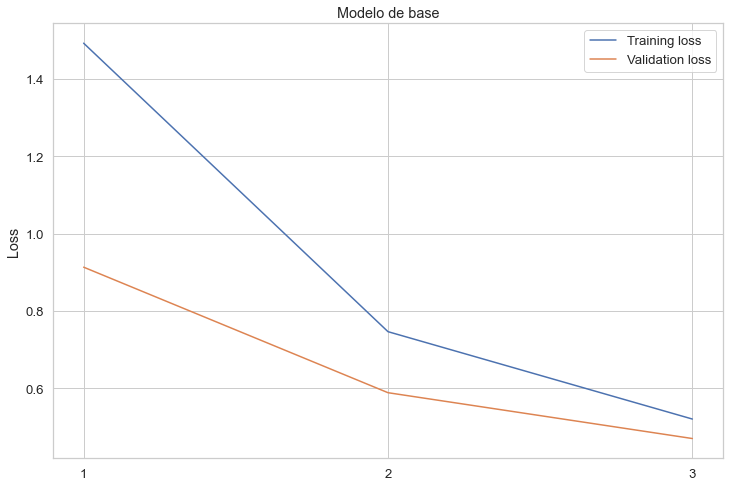

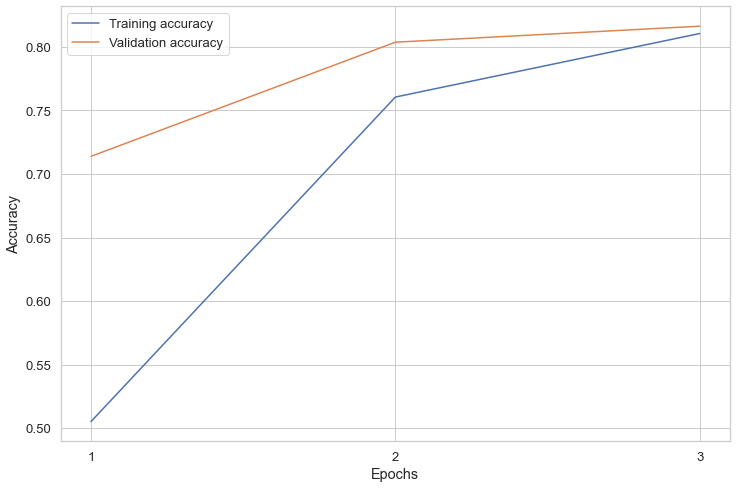

In [30]:
# El atributo `history` contiene un diccionario de métricas por epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,8))
plt.title('Modelo de base')
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.xticks(ticks=epochs)
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])

plt.figure(figsize=(12,8))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.xticks(ticks=list(epochs))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy']);

In [31]:
epochs = 3

In [32]:
# Entrenamos el mejor modelo para luego validar en testeo
mejor_modelo.fit(
x=x_train,
y=y_train,
batch_size=batch_size,
epochs=epochs,
verbose=verbose,
callbacks=callbacks_list)

Epoch 1/3
62/62 [==============================] - 3s 43ms/step - loss: 0.4251 - accuracy: 0.8273
Epoch 2/3
62/62 [==============================] - 2s 38ms/step - loss: 0.3722 - accuracy: 0.8377
Epoch 3/3
62/62 [==============================] - 3s 42ms/step - loss: 0.3432 - accuracy: 0.8446


### Testeo

In [33]:
y_pred = mejor_modelo.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [34]:
y_pred.shape, y_test.shape

((13470,), (13470,))

In [35]:
y_pred

array([7, 6, 5, ..., 5, 2, 5], dtype=int64)

In [36]:
y_test

array([7, 6, 5, ..., 4, 2, 5])

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.06      0.10       471
           1       0.29      0.07      0.12       233
           2       0.99      0.99      0.99      2715
           3       0.47      0.78      0.58       235
           4       0.36      0.15      0.21      1338
           5       0.51      0.79      0.62      2052
           6       0.98      0.97      0.97      3382
           7       0.96      0.98      0.97      3044

    accuracy                           0.82     13470
   macro avg       0.60      0.60      0.57     13470
weighted avg       0.80      0.82      0.79     13470



In [38]:
cm = confusion_matrix(y_test, y_pred)

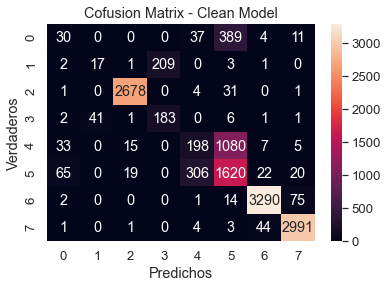

In [39]:
sns.heatmap(cm, annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.title('Cofusion Matrix - Clean Model')
plt.xlabel('Predichos');